In [1]:
import numpy as np
import scenedetect
import os
from scenedetect.video_manager import VideoManager
from scenedetect.scene_manager import SceneManager
from scenedetect.frame_timecode import FrameTimecode
from scenedetect.stats_manager import StatsManager
from scenedetect.detectors import ContentDetector

/home2/souvikg544/miniconda3/envs/lrw/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
a = np.load('/ssd_scratch/cvit/souvik/preprocessed_lrs2_pretrain/5982136536015934617/00002/ref.npz')

In [4]:
a

NpzFile '/ssd_scratch/cvit/souvik/preprocessed_lrs2_pretrain/5982136536015934617/00002/ref.npz' with keys: ref

In [6]:
a['ref'].shape

(1, 256)

In [2]:
vtp = np.load("/ssd_scratch/cvit/souvik/mvlrs_v1/pretrain/6299464611223367288/00003_vtp.npy")

In [3]:
vtp.shape

(123, 512)

In [3]:
os.path.exists('/ssd_scratch/cvit/souvik/mvlrs_v1/pretrain/6253040309720958951/00026.mp4')

False

In [20]:
import torch
import decord
from decord import VideoReader, cpu
import matplotlib.pyplot as plt
import pickle
from scipy import signal

In [13]:
with open("/home2/souvikg544/souvik/lip2speech/vtp/data/pywork/something/faces.pckl", "rb") as f:
    faces = pickle.load(f)

In [46]:
det = faces[0][0]['bbox']

In [47]:
for i in range(len(det)):
    det[i] = int(det[i])

In [41]:
track

[{'frame': 0, 'bbox': [43, 2, 119, 108], 'conf': 0.9867678284645081}]

In [42]:
video_path = '/home2/souvikg544/00027.mp4'
vr = VideoReader(video_path, ctx=cpu(0))

In [43]:
frame = vr[0].asnumpy()

In [48]:
dets = {'x':[], 'y':[], 's':[]}



dets['s'].append(max((det[3]-det[1]),(det[2]-det[0]))/2) 
dets['y'].append((det[1]+det[3])/2) # crop center x 
dets['x'].append((det[0]+det[2])/2) # crop center y

# Smooth detections
# dets['s'] = signal.medfilt(dets['s'],kernel_size=13)   
# dets['x'] = signal.medfilt(dets['x'],kernel_size=13)
# dets['y'] = signal.medfilt(dets['y'],kernel_size=13)


/home2/souvikg544/miniconda3/envs/lrw/lib/python3.10/site-packages/scipy/signal/_signaltools.py:1563: UserWarning: kernel_size exceeds volume extent: the volume will be zero-padded.
  warnings.warn('kernel_size exceeds volume extent: the volume will be '


In [49]:
dets

{'x': array([0.]), 'y': array([0.]), 's': array([0.])}

In [34]:
c_frame = frame[det[1]:det[3],det[0]:det[2]]

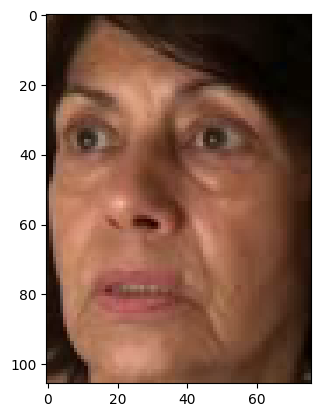

In [35]:
plt.imshow(c_frame)

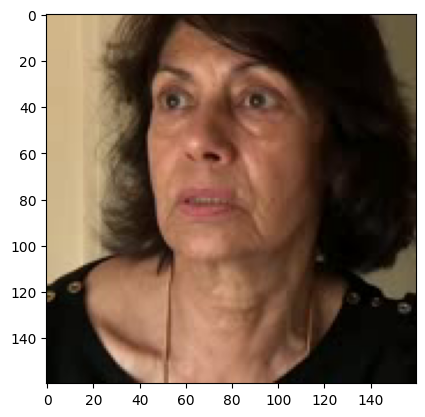

In [19]:
plt.imshow(frame)